### **Installing and importing dependencies**

Installing Tensorflow if in case it is not pre installed

In [1]:
!pip install tensorflow

Establishing connection between the drive and the collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np  # Library for numerical operations and working with arrays.
import pandas as pd  # Data manipulation and analysis library, especially for structured data.
import matplotlib.pyplot as plt  # Plotting library used for creating static, animated, and interactive visualizations.
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve
# Metrics and functions from scikit-learn for evaluating classification models (accuracy, precision, recall, F1, etc.).
import seaborn as sns  # Data visualization library based on matplotlib, useful for drawing informative and attractive statistical graphics.
from sklearn.model_selection import train_test_split  # Utility function for splitting a dataset into training and testing sets.
from sklearn.feature_extraction.text import CountVectorizer  # Converts text data into a matrix of token counts for text processing.
import nltk  # Natural Language Toolkit, a library for working with human language data (text processing, tokenization, etc.).


In [4]:
nltk.download('stopwords')  # Downloads the list of common stopwords in various languages, which can be used for text preprocessing.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import re  # Regular expressions module for string searching, pattern matching, and text manipulation.
import nltk  # Natural Language Toolkit, used for text analysis and preprocessing.
stemmer = nltk.SnowballStemmer("english")  # Initializes a SnowballStemmer for stemming English words, reducing words to their base forms.
from nltk.corpus import stopwords  # Imports a corpus of common stopwords, such as 'the', 'is', 'in', etc.
import string  # Provides constants and functions to manipulate strings, especially punctuation.
stopword = set(stopwords.words("english"))  # Converts the list of English stopwords into a set for faster lookup.


## **Importing the dataset**

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Dubai conference/twitter_data.csv") #importing the dataset

In [7]:
df.head() #printing the first 5 rows of the dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df['labels'] = df['class'].map({0:"Hate speech detected",1:"Offensive language detected",3:"no hate and offesnsive speech"}) #mapping the classes to a label and adding a new colmn
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


## **Clearning the tweets**

In [9]:
def clean(text):
  text=str(text).lower()  # Convert the text to string and lowercase all characters.
  text=re.sub('\[.*?\]','',text)  # Remove text inside square brackets.
  text=re.sub('https?://\S+|WWW\.\S+','',text)  # Remove URLs (both http and www links).
  text=re.sub('<,*?>*','',text)  # Remove HTML tags.
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)  # Remove all punctuation marks.
  text=re.sub('\n','',text)  # Remove newline characters.
  text=re.sub('\w*\d\w*','',text)  # Remove words containing digits.
  text=[word for word in text.split(' ') if word not in stopword]  # Remove stopwords from the text.
  text=" ".join(text)  # Join the cleaned words back into a single string.
  return text

df["tweet"]=df["tweet"].apply(clean)  # Apply the 'clean' function to each tweet in the 'tweet' column of the DataFrame.
print(df.head())  # Print the first 5 rows of the DataFrame after cleaning.


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0   rt mayasolovely woman shouldnt complain clean...   
1   rt  boy dats coldtyga dwn bad cuffin dat hoe ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3           rt cganderson vivabased look like tranny   
4   rt shenikaroberts shit hear might true might ...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [10]:
df = df.dropna()  # Removes rows with NaN values


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SpatialDropout1D, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [12]:
rows_as_list = df.values.tolist()
column_index = 5  # Index of the column you want to extract
column_list = []
for i in range(0,len(rows_as_list)):
  column_list.append(rows_as_list[i][5])

print(column_list.count(1))

19190


In [13]:

texts = list(df["tweet"])  # List of tweets
labels = column_list
# 0 for "hate_speech," 1 for "offensive_language," 2 for "neither"

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)  # Adjust vocabulary size as needed
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = 100  # Adjust as needed
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert labels to one-hot encoding
num_classes = 3  # Three classes: "hate_speech," "offensive_language," "neither"
labels = tf.keras.utils.to_categorical(labels, num_classes)



## **Model Building**

In [14]:

# Define the LSTM model with additional layers
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))  # First LSTM layer with return_sequences=True to stack another LSTM
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(LSTM(64))  # Second LSTM layer
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
# Train the model (split your dataset into training and testing sets)
his = model.fit(sequences, labels, validation_split=0.2, epochs=5, batch_size=64)  # Adjust hyperparameters

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 109s 373ms/step - accuracy: 0.9056 - loss: 0.3315 - val_accuracy: 0.9433 - val_loss: 0.1841
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 96s 372ms/step - accuracy: 0.9294 - loss: 0.1912 - val_accuracy: 0.9420 - val_loss: 0.1674
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 95s 366ms/step - accuracy: 0.9455 - loss: 0.1437 - val_accuracy: 0.9370 - val_loss: 0.1847
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 145s 379ms/step - accuracy: 0.9562 - loss: 0.1205 - val_accuracy: 0.9418 - val_loss: 0.1822
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 139s 368ms/step - accuracy: 0.9666 - loss: 0.0987 - val_accuracy: 0.9370 - val_loss: 0.2064


## **Printing results**

In [16]:
h=his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

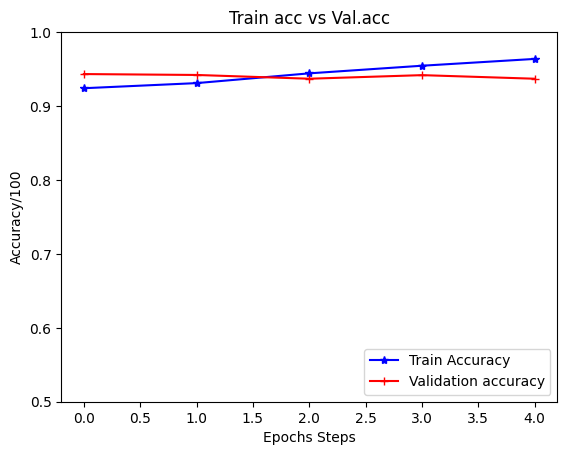

In [17]:
l1,=plt.plot(h['accuracy'],c="blue",marker='*')
l2,=plt.plot(h['val_accuracy'],c="red",marker='+')
plt.legend((l1,l2),["Train Accuracy","Validation accuracy",],loc="lower right")
plt.xlabel('Epochs Steps')
plt.ylabel('Accuracy/100')
plt.title("Train acc vs Val.acc")
plt.ylim(0.5,1.00)
plt.show()

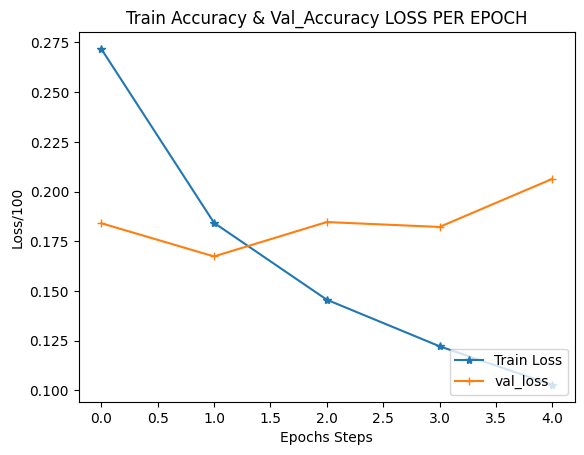

In [18]:
l1,=plt.plot(h['loss'],marker='*')
l2,=plt.plot(h['val_loss'],marker='+')
plt.legend((l1,l2),["Train Loss","val_loss"],loc="lower right")
# plt.legend(["LOSS"],loc="lower righ/8t")
plt.xlabel('Epochs Steps')
plt.ylabel('Loss/100')
plt.title("Train Accuracy & Val_Accuracy LOSS PER EPOCH")
plt.show()

In [19]:
x=np.array(df["tweet"])
y=np.array(df["labels"])
cv=CountVectorizer()
x=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = model.predict(X_test[0:30])
y_pred = y_pred_probs.argmax(axis=1)

# Assuming 'labels' is a list of your class names in the correct order
y_pred_labels = [labels[i] for i in y_pred]  # Convert predicted indices to labels

# Confusion Matrix
 # Use string labels for both

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


In [21]:
y_test
list_y_test = y_test.tolist()
print(list_y_test[0],'\n',list_y_test[1],'\n',list_y_test[2])

Offensive language detected 
 Offensive language detected 
 Offensive language detected


In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the encoder to the text labels and transform them into numerical values
numerical_labels_encoded = label_encoder.fit_transform(list_y_test
                                                       )
numerical_labels_encoded_list=list(numerical_labels_encoded)
print(numerical_labels_encoded_list[:30])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


Accuracy Score: 93.33%
Precision Score: 100.00%
Recall Score: 93.33%
F1 Score: 96.55%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


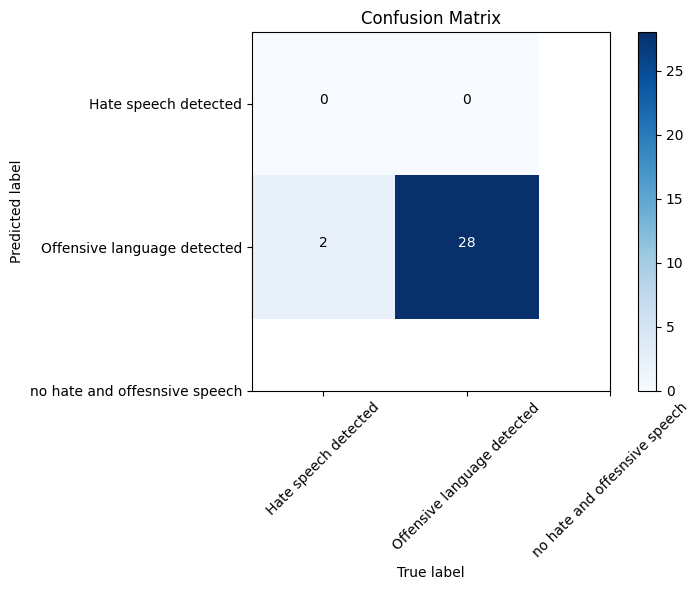

In [23]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import auc, precision_recall_curve

print(f"Accuracy Score: {accuracy_score(y_pred, numerical_labels_encoded_list[:30]) * 100:.2f}%")
precision = precision_score(y_pred, numerical_labels_encoded_list[0:30], average='weighted') * 100
recall = recall_score(y_pred, numerical_labels_encoded_list[0:30], average='weighted') * 100
f1 = f1_score(y_pred, numerical_labels_encoded_list[0:30], average='weighted') * 100
print(f"Precision Score: {precision:.2f}%")
print(f"Recall Score: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred, numerical_labels_encoded_list[0:30])

# Convert to DataFrame for better visualization

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_names =['Hate speech detected', 'Offensive language detected', 'no hate and offesnsive speech']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Annotate the matrix with the counts
thresh = conf_matrix.max() / 2.0
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.tight_layout()
plt.show()


